In [1]:
!pip install googletrans
!pip install tqdm --upgrade
!pip install twython

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=09715f778c769d898dd2e5000688ff2a598e78001dc6dc6f246fa30b3e1331ad
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans
     |████████████████████████████████| 61kB 1.7MB/s 
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0


In [0]:
# web scraping
import requests
from bs4 import BeautifulSoup
from time import time, sleep
from random import randint

# Translation
from googletrans import Translator

# Utilities
from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

# NLP
from nltk import sent_tokenize, word_tokenize, pos_tag, RegexpParser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [3]:
# Download resources
import nltk

nltk.download("punkt")
nltk.download("vader_lexicon")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
def honestdoc_comment(url, hospitalName):
    """
    This function is to scrap data from a webboard (https://www.honestdocs.com).

    INPUT
    url : String
      URL of the target website
    
    OUTPUT
    comment : List
      List of comments
    score : List
      List of rating score
    """
    #create connection
    data = requests.get(url)
    print("requests code : {}".format(data.status_code)) 
    print("note\n2xx: success\n4xx, 5xx: error")
    
    #scrape comment and score
    start_time = time() #start scraping data from page1
    r = requests.get(url, params=dict(query="web scraping",page=1)) 
    soup = BeautifulSoup(r.text,"html.parser")
    n = len(soup.find_all("div",{"class":"comments__content"})) #find n of items in the page
    
    #extract each item
    comment = [soup.find_all("div",
                             {"class":"comments__content"})[i].get_text().strip() for i in range(0,n)]
    score = [soup.find_all("span",
                           {"class":"stars star-rating"})[i].attrs["data-score"] for i in range(0,n)]
    elapsed_time = time() - start_time #finish scraping data from page1
    print("Time used for scraping data from page - 1 : {} s".format(elapsed_time))
    sleep(randint(1,3)) #mimic human behavior
           
    p = 2 #start scraping data from page2
    while n > 0: #until the number of items in a page = 0
        start_time = time() 
        r = requests.get(url, params=dict(query="web scraping",page=p))
        soup = BeautifulSoup(r.text,"html.parser")
        n = len(soup.find_all("div",{"class":"comments__content"}))
        [comment.append(soup.find_all("div",
                                      {"class":"comments__content"})[i].get_text().strip()) for i in range(0,n)]
        [score.append(soup.find_all("span",
                                    {"class":"stars star-rating"})[i].attrs["data-score"]) for i in range(0,n)]
        elapsed_time = time() - start_time
        print("Time used for scraping data from page - {} : {} s".format(p, elapsed_time))
        p +=1
        sleep(randint(1,3))

    df = pd.DataFrame({"comment": comment, 
              "score": score
              })
    
    df["hospital"] = hospitalName
    
    return df

In [7]:
df = honestdoc_comment(r"https://www.honestdocs.co/hospitals/praram-9-hospital", "praram-9-hospital")
comments = df

requests code : 200
note
2xx: success
4xx, 5xx: error
Time used for scraping data from page - 1 : 1.3294239044189453 s
Time used for scraping data from page - 2 : 1.228851079940796 s
Time used for scraping data from page - 3 : 1.234156608581543 s
Time used for scraping data from page - 4 : 1.2197554111480713 s
Time used for scraping data from page - 5 : 1.2204604148864746 s
Time used for scraping data from page - 6 : 1.2380759716033936 s
Time used for scraping data from page - 7 : 1.2272183895111084 s
Time used for scraping data from page - 8 : 1.2313995361328125 s
Time used for scraping data from page - 9 : 1.238645315170288 s
Time used for scraping data from page - 10 : 1.2264599800109863 s
Time used for scraping data from page - 11 : 1.2167270183563232 s
Time used for scraping data from page - 12 : 1.239713430404663 s
Time used for scraping data from page - 13 : 1.2339904308319092 s
Time used for scraping data from page - 14 : 1.2178230285644531 s
Time used for scraping data from pa

In [8]:
comments.shape

(98, 3)

In [0]:
def th2en(comment):
  try:
    textTrans = Translator().translate(comment, src="th", dest="en").text
  except:
    textTrans = ""
    print("\n Can not translate " + comment)

  return textTrans

In [10]:
tqdm.pandas()
comments["en"] = comments.progress_apply(lambda x: th2en(x["comment"]), axis=1)

100%|██████████| 98/98 [00:16<00:00,  6.08it/s]


In [11]:
comments.shape

(98, 4)

In [12]:
comments["hospital"].value_counts()

praram-9-hospital    98
Name: hospital, dtype: int64

In [13]:
comments.head()

,comment,score,hospital,en
0,ได้รับการเปลี่ยนข้อเข่าจากคุณหมอณัฐวุฒิข้างเดี...,5,praram-9-hospital,Get a knee replacement by the doctor Nattawut ...
1,บริการดีมาก พยาบาลพูดจาดี ดูแลดี ให้ความช่วยเห...,5,praram-9-hospital,"Very good service, good nursing care flatterin..."
2,จริงก็ไปพระราม9ตลอด เพราะสะดวก สะอาดรวดรวดเร็ว...,2,praram-9-hospital,"Truth to Rama 9, as well as fast, convenient, ..."
3,ระบบการให้การรักษามีมาตรฐานสูง พนักงานใส่ใจดี,5,praram-9-hospital,System to maintain a high standard. Good atten...
4,คุณหมอน่ารัก แนะนำ ให้คำปรึกษาดี เจ้าหน้าที่ย...,5,praram-9-hospital,Doctor's Advice Consulting nice. staff smiling...


In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/DS532_Text_Analytic/Project_Hospital')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#backup data 
comments.to_csv("comment_praram-9-hospital.csv", index=False)

In [0]:
comments = pd.read_csv("comment_praram-9-hospital.csv")

In [0]:
def sent_level_polarity(df, target):
  sentences = []
  scores = []
  hospitals = []
  cids = []
  for i in df.index:
    en = df.loc[i, target]
    score = df.loc[i, "score"]
    hospital = df.loc[i, "hospital"]
    s = sent_tokenize(en)
    sentences = sentences + s
    scores = scores + [score]*len(s)
    hospitals = hospitals + [hospital]*len(s)
    cids = cids + [i]*len(s)
  return pd.DataFrame({"cid": cids
                       , "sentences": sentences
                       , "scores": scores
                       , "hospital": hospitals})

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [0]:
data = sent_level_polarity(df=comments, target="en")
data["sentiment_polarity"] = data["sentences"].apply(lambda x: predict_sentiment(x))

In [20]:
data.shape

(223, 5)

In [21]:
data.head()

,cid,sentences,scores,hospital,sentiment_polarity
0,0,Get a knee replacement by the doctor Nattawut ...,5,praram-9-hospital,neutral
1,0,You made very good But I have trouble travelin...,5,praram-9-hospital,positive
2,0,foreign it would not have to ask for the time ...,5,praram-9-hospital,neutral
3,0,Take into consideration interfering with it.,5,praram-9-hospital,neutral
4,1,"Very good service, good nursing care flatterin...",5,praram-9-hospital,positive


## **Exclude Neutral**

Neutral comments will be excluded.

In [0]:
data = data[data["sentiment_polarity"] != "neutral"].reset_index(drop=True)

In [23]:
data.shape

(149, 5)

In [24]:
data.head()

,cid,sentences,scores,hospital,sentiment_polarity
0,0,You made very good But I have trouble travelin...,5,praram-9-hospital,positive
1,1,"Very good service, good nursing care flatterin...",5,praram-9-hospital,positive
2,1,The key is not to wait And the doctor advised ...,5,praram-9-hospital,positive
3,1,I've been sick suddenly Was treated immediatel...,5,praram-9-hospital,negative
4,1,I always treat stomach Severe abdominal pain Y...,5,praram-9-hospital,positive


# **Marking Negation**
Negation twists sentiment polarity. Let's mark them and twist sentiment polarity.

In [0]:
data["neg_mark"] = data["sentences"].apply(lambda x: " ".join(mark_negation(x.split())))

In [0]:
data["flag"] = data["neg_mark"].apply(lambda x: True if "_NEG" in x else False)

In [0]:
def neg_extract(text):
  tokens = word_tokenize(text)
  return " ".join([token[0:-4] if token[-4:] == "_NEG" else token for token in tokens])

In [0]:
data["neg_words"] = data["neg_mark"].apply(lambda x: neg_extract(x))

In [0]:
data["post_polarity"] = data["neg_words"].apply(lambda x: predict_sentiment(x))

In [30]:
data2 = data[data["sentiment_polarity"] != data["post_polarity"]].reset_index(drop=True)
data2.head()

,cid,sentences,scores,hospital,sentiment_polarity,neg_mark,flag,neg_words,post_polarity


In [31]:
data.shape

(149, 9)

In [32]:
data.head()

,cid,sentences,scores,hospital,sentiment_polarity,neg_mark,flag,neg_words,post_polarity
0,0,You made very good But I have trouble travelin...,5,praram-9-hospital,positive,You made very good But I have trouble travelin...,True,You made very good But I have trouble travelin...,positive
1,1,"Very good service, good nursing care flatterin...",5,praram-9-hospital,positive,"Very good service, good nursing care flatterin...",False,"Very good service , good nursing care flatteri...",positive
2,1,The key is not to wait And the doctor advised ...,5,praram-9-hospital,positive,The key is not to_NEG wait_NEG And_NEG the_NEG...,True,The key is not to wait And the doctor advised ...,positive
3,1,I've been sick suddenly Was treated immediatel...,5,praram-9-hospital,negative,I've been sick suddenly Was treated immediatel...,False,I 've been sick suddenly Was treated immediate...,negative
4,1,I always treat stomach Severe abdominal pain Y...,5,praram-9-hospital,positive,I always treat stomach Severe abdominal pain Y...,False,I always treat stomach Severe abdominal pain Y...,positive


# **Parsing**

In [0]:
grammar = """NP: {<NN|NNS>+}
                {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)

def parsing_extract(sentence):
  parsed_tree = chunker.parse(pos_tag(word_tokenize(sentence)))

  nps = []
  for subtree in parsed_tree.subtrees():
      if subtree.label() == 'NP':
          t = subtree
          t = " ".join(word for word, tag in t.leaves())
          nps.append(t)
  return nps

In [0]:
data["NP"] = data["sentences"].apply(lambda x: parsing_extract(x))

In [35]:
data.shape

(149, 10)

In [36]:
data.head()

,cid,sentences,scores,hospital,sentiment_polarity,neg_mark,flag,neg_words,post_polarity,NP
0,0,You made very good But I have trouble travelin...,5,praram-9-hospital,positive,You made very good But I have trouble travelin...,True,You made very good But I have trouble travelin...,positive,"[trouble, hospital, surgery, customers, card, ..."
1,1,"Very good service, good nursing care flatterin...",5,praram-9-hospital,positive,"Very good service, good nursing care flatterin...",False,"Very good service , good nursing care flatteri...",positive,"[service, nursing care, support]"
2,1,The key is not to wait And the doctor advised ...,5,praram-9-hospital,positive,The key is not to_NEG wait_NEG And_NEG the_NEG...,True,The key is not to wait And the doctor advised ...,positive,"[key, doctor, cost, bathroom]"
3,1,I've been sick suddenly Was treated immediatel...,5,praram-9-hospital,negative,I've been sick suddenly Was treated immediatel...,False,I 've been sick suddenly Was treated immediate...,negative,"[drug, quality]"
4,1,I always treat stomach Severe abdominal pain Y...,5,praram-9-hospital,positive,I always treat stomach Severe abdominal pain Y...,False,I always treat stomach Severe abdominal pain Y...,positive,"[stomach, pain, track, appointment, drug]"


# **Split dataframe into positive and negative sentiment**

In [0]:
pos = data[data["sentiment_polarity"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [38]:
poshist.sort_values(by='#pos', ascending=False)

,words,#pos
136,service,28
18,care,16
48,doctor,12
82,hospital,12
49,doctors,10
...,...,...
74,heads,1
73,headache service,1
72,grandma,1
71,generosity,1


In [0]:
neg = data[data["sentiment_polarity"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

In [40]:
neghist.sort_values(by='#neg', ascending=False)

,words,#neg
25,hospital,7
13,doctor,6
38,pain,4
49,service,3
57,time,3
...,...,...
30,kidney transplant,1
31,list,1
1,anesthesia,1
33,name,1


In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

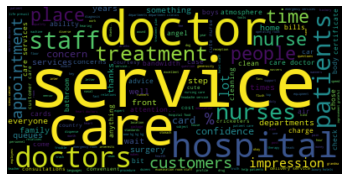

In [43]:
vizwordcloud(poshist)

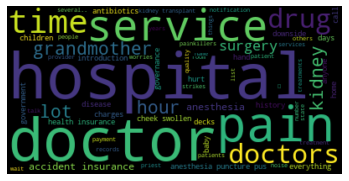

In [44]:
vizwordcloud(neghist)